# Exploratory Data Analysis

### Background Information
This analysis for XYZ, a private investing firm in the US, will take a look at possible cab companies for a future investment. 


### Objective
Procure information about the cab industry for the Go-to-Market(G2M) strategy to choose a company to invest in.


### Import Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

from datetime import timedelta, datetime

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
# adjusts configuration of plots


# read in data
df_cab_data = pd.read_csv('Cab_Data.csv')
df_customer_id = pd.read_csv('Customer_ID.csv')
df_transaction_id = pd.read_csv('Transaction_ID.csv')
df_city = pd.read_csv('City.csv')

### Inspecting the Data

The files listed below are a compilation of data from two Cab companies from 2016 to 2018

1. Cab_Data.csv
2. Customer_ID.csv
3. Transaction_ID.csv
4. City.csv

#### Cab_Data File 

In [2]:
df_cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/16,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/16,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/16,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/16,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/16,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
df_cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [4]:
# cab company names
names = pd.unique(df_cab_data.Company)
print('Names: ',names, '\n\n')

# cities
cities = pd.unique(df_cab_data.City)
print('Cities: ', cities, '\n\n')
len(cities)
# number of cities
print('Number of cities: ', len(cities))

# checking for duplicate transaction IDs
IDs = (pd.unique(df_cab_data['Transaction ID']))
print(len(IDs), ' is the number of total entries, therefore, there are no duplicate transactions.')

Names:  ['Pink Cab' 'Yellow Cab'] 


Cities:  ['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC'] 


Number of cities:  19
359392  is the number of total entries, therefore, there are no duplicate transactions.


#### Customer_ID File

In [5]:
df_customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
df_customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


#### Transaction_ID File

In [7]:
df_transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [8]:
df_transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


#### City File

In [9]:
df_city.head()

,City,Population,Users
0,NEW YORK NY,8405837.0,302149.0
1,CHICAGO IL,1955130.0,164468.0
2,LOS ANGELES CA,1595037.0,144132.0
3,MIAMI FL,1339155.0,17675.0
4,SILICON VALLEY,1177609.0,27247.0


In [10]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [11]:
# cities
cities1 = pd.unique(df_city.City)
print('Cities: ', cities1, '\n\n')
len(cities1)
# number of cities
print('Number of cities: ', len(cities1))

Cities:  ['NEW YORK NY' 'CHICAGO IL' 'LOS ANGELES CA' 'MIAMI FL' 'SILICON VALLEY'
 'ORANGE COUNTY' 'SAN DIEGO CA' 'PHOENIX AZ' 'DALLAS TX' 'ATLANTA GA'
 'DENVER CO' 'AUSTIN TX' 'SEATTLE WA' 'TUCSON AZ' 'SAN FRANCISCO CA'
 'SACRAMENTO CA' 'PITTSBURGH PA' 'WASHINGTON DC' 'NASHVILLE TN'
 'BOSTON MA'] 


Number of cities:  20


### Hypothesis
- Null hypothesis: there will not be a difference in the number of trips made per city between the two companies.
- Alternative hypothesis: one company will have more trips per city than the other.



### Exploratory Data Analysis
To investigate this potential relationship, Cab_Data.csv and City.csv will be examined. 

In [12]:
df_cab_data.City.value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

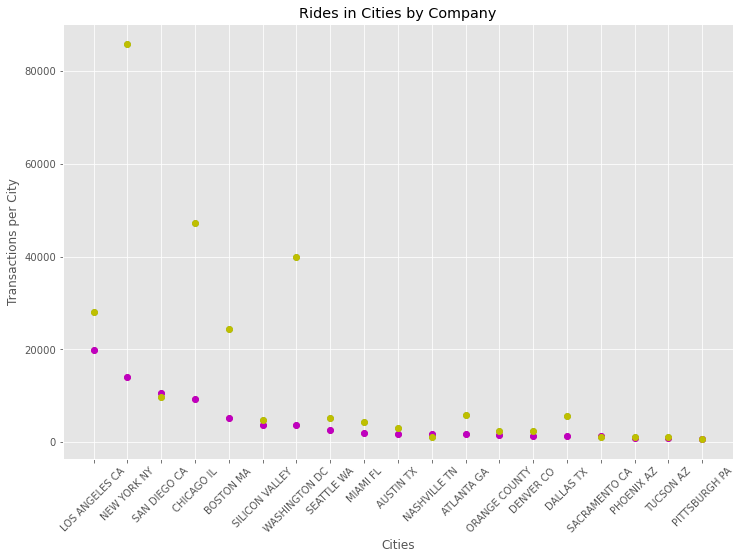

In [13]:
pink_cities = df_cab_data[df_cab_data['Company']=='Pink Cab']
pink_cities2 = pink_cities.City.value_counts()
plt.plot(pink_cities2, 'om')


plt.xticks(rotation=45)
plt.scatter(pink_cities2.index, pink_cities2.values)

yellow_cities = df_cab_data[df_cab_data['Company']=='Yellow Cab']
yellow_cities2 = yellow_cities.City.value_counts()

plt.plot(yellow_cities2, 'oy')

plt.scatter(yellow_cities2.index, yellow_cities2.values)

plt.title("Rides in Cities by Company")
plt.xlabel("Cities")
plt.ylabel("Transactions per City")
plt.show()

The scatterplot above supports the alternative hypothesis, that the Yellow Cab company for the most part had more trips in most cities. The totals below also show that the Yellow Cab company had many more transactions recorded in this data.

In [14]:
pink_rides = len(pink_cities)
yellow_rides = len(yellow_cities)

print('Pink Cab Rides: ', pink_rides)
print('Yellow Cab Rides: ', yellow_rides)

Pink Cab Rides:  84711
Yellow Cab Rides:  274681


### Hypothesis
- Null hypothesis: there will not be a difference in the total income of trips made per city between the two companies.
- Alternative hypothesis: one company will have made more money per city than the other.



### Exploratory Data Analysis
To investigate this potential relationship, Cab_Data.csv and City.csv will be examined. 

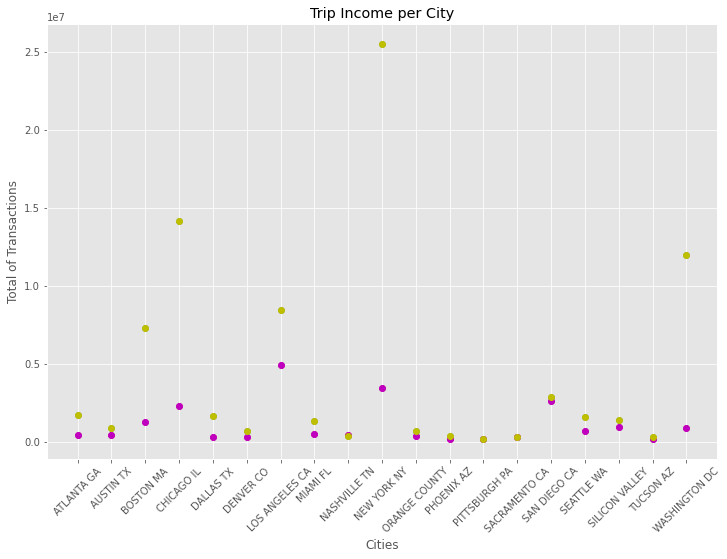

In [15]:
pink_cities = df_cab_data[df_cab_data['Company']=='Pink Cab']
pink_cities2 = pink_cities.groupby(['City'])["Cost of Trip"].sum()
plt.plot(pink_cities2, 'om')

plt.xticks(rotation=45)
plt.scatter(pink_cities2.index, pink_cities2.values)

yellow_cities = df_cab_data[df_cab_data['Company']=='Yellow Cab']
yellow_cities2 = yellow_cities.groupby(['City'])["Cost of Trip"].sum()
plt.plot(yellow_cities2, 'oy')

plt.scatter(yellow_cities2.index, yellow_cities2.values)

plt.title("Trip Income per City")
plt.xlabel("Cities")
plt.ylabel("Total of Transactions")
plt.show()

The scatterplot above supports the alternative hypothesis, the Yellow Cab company made more money per city than the Pink Cab company. The totals below also support the alternative hypothesis because the Yellow Cab company had a higher income during this time.

In [16]:
pink_money = sum(pink_cities['Cost of Trip'])
yellow_money = sum(yellow_cities['Cost of Trip'])

print('Pink Cab Total Cost of Trips: ', pink_money)
print('Yellow Cab Total Cost of Trips: ', yellow_money)

Pink Cab Total Cost of Trips:  21020923.009000227
Yellow Cab Total Cost of Trips:  81833514.01919927


### Conclusion
Based on the analyses above, the Yellow Cab company had more rides and more total income according to the data provided.

### Hypothesis
- Null hypothesis: neither company has shown an increase in growth over the time the data was collected.
- Alternative hypothesis: one of the companies has shown increased growth during the time period the data was collected.

### Exploratory Data Analysis
To investigate the potential relationship, the Transaction ID file and the Cab Data file will be used.

In [17]:
# merge the two tables to create a new table
t_c_df = pd.merge(df_cab_data, df_transaction_id)
t_c_df['Date of Travel'] = pd.to_datetime(t_c_df['Date of Travel'], format='%m/%d/%y')

t_c_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [51]:
years = []
for year in range(len(t_c_df['Date of Travel'])):
    years.append(t_c_df['Date of Travel'][year].year)
    
t_c_df['Year'] = years

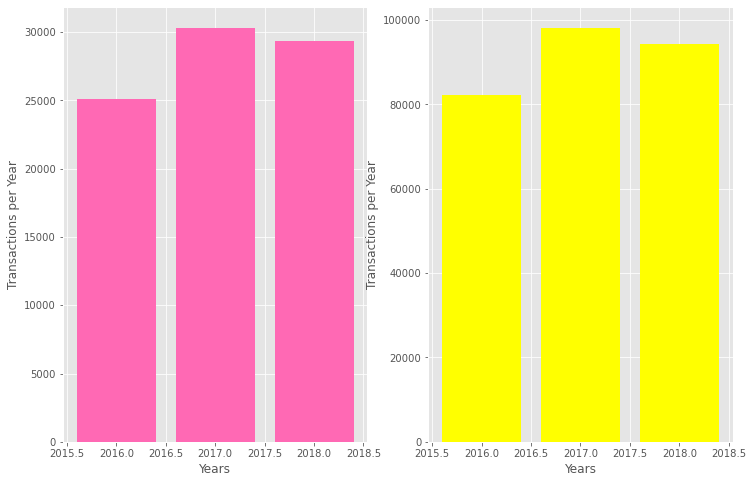

In [67]:
pink_years = t_c_df[t_c_df['Company']=='Pink Cab']
pink_years2 = pink_years.Year.value_counts()
plt.subplot(1,2,1)
plt.bar(pink_years2.index, pink_years2.values, color = "hotpink")

plt.xlabel("Years")
plt.ylabel("Transactions per Year")

yellow_years = t_c_df[t_c_df['Company']=='Yellow Cab']
yellow_years2 = yellow_years.Year.value_counts()
plt.subplot(1,2,2)
plt.bar(yellow_years2.index, yellow_years2.values, color = "yellow")

plt.xlabel("Years")
plt.ylabel("Transactions per Year")
plt.show()

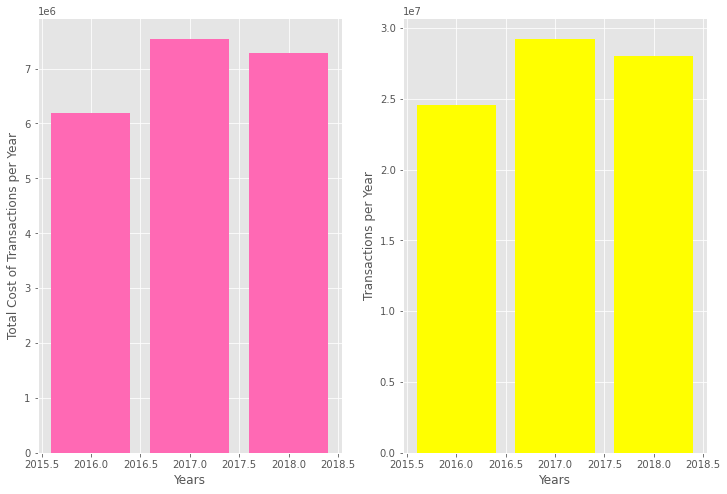

In [71]:
pink_years = t_c_df[t_c_df['Company']=='Pink Cab']
pink_years2 = pink_years.groupby(['Year'])["Cost of Trip"].sum()
plt.subplot(1,2,1)
plt.bar(pink_years2.index, pink_years2.values, color = "hotpink")

plt.xlabel("Years")
plt.ylabel("Total Cost of Transactions per Year")

yellow_years = t_c_df[t_c_df['Company']=='Yellow Cab']
yellow_years2 = yellow_years.groupby(['Year'])["Cost of Trip"].sum()
plt.subplot(1,2,2)
plt.bar(yellow_years2.index, yellow_years2.values, color = "yellow")

plt.xlabel("Years")
plt.ylabel("Transactions per Year")
plt.show()

#### Conclusion
The bar graphs show that the Yellow Cab company has more rapidly increased their rides and income during this period of time, which supports the alternative hypothesis.